# Part 3: Collaborative Filtering Recommender System

## Section A: Introduction

**(Dataset)**: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset

### Collaborative Filtering Recommender Systems

▪ Collaborative filtering recommender systems do not require metadata like its content-based counterparts.

▪ These systems try to predict the rating or preference that a user would give an item based on past interactions (ratings and preferences) recorded between users and items in order to produce new recommendations. 

<img src="collaborative.png" width="350">

▪ These interactions are stored in the so-called "user-item interactions matrix".

▪ A user-to-item matrix comprises individual users in the rows and individual elements in the columns. 

<img src="matrix.png" width="600">

▪ Therefore, recommendation systems based on collaborative filtering can be categorized into two ways: **Item-based** and **User-based**.

## Section B: Walkthrough Examples

### groupby()

▪ DataFrame.groupby() function is used to collect the identical data into groups and perform **aggregate** functions on the grouped data. 

▪ Group by operation involves splitting the data, applying some functions, and finally aggregating the results.

<img src="groupby.png" width="800">

https://www.analyticsvidhya.com/blog/2020/03/groupby-pandas-aggregating-data-python/

### Aggregation Functions

▪ count() – Number of non-null observations

▪ sum() – Sum of values

▪ mean() – Mean of values

▪ median() – Arithmetic median of values

▪ min() – Minimum

▪ max() – Maximum

https://www.analyticsvidhya.com/blog/2020/03/groupby-pandas-aggregating-data-python/

### Example 1

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

In [ ]:
import pandas as pd

df_test = pd.DataFrame({'Animal': ['Falcon', 'Falcon', 'Parrot', 'Parrot'], 
                        'Max Speed': [380., 370., 24., 26.]})
df_test

### Calculating the occurrences of values

In [ ]:
df_test.groupby(['Animal']).count()

In [ ]:
df_test.groupby(['Animal']).agg({"Max Speed": "count"})

### Calculating the mean of values

In [ ]:
df_test.groupby(['Animal']).mean()

### Calculating the median of values

In [ ]:
df_test.groupby(['Animal']).median()

### Calculating the sum of values

In [ ]:
df_test.groupby(['Animal']).sum()

### Calculating the min of values

In [ ]:
df_test.groupby(['Animal']).min()

### Calculating the max of values

In [ ]:
df_test.groupby(['Animal']).max()

### Example 2

https://sparkbyexamples.com/pyspark/pandas-api-on-apache-spark-pyspark/

In [ ]:
technologies = ({'Courses':["Spark", "PySpark", "Hadoop", "Python", "Pandas", "Hadoop", "Spark", "Python", "NA"],
                 'Fee':[22000, 25000, 23000, 24000, 26000, 25000, 25000, 22000, 1500],
                 'Days':[30, 50, 55, 40, 60, 35, 30, 50, 40],
                 'Discount':[1000, 2300, 1000, 1200, 2500, None, 1400, 1600, 0]})

df_test = pd.DataFrame(technologies)
df_test

### Calculating the sum of values

In [ ]:
df_test.groupby(['Courses']).sum()

### Removing Sorting

In [ ]:
df_test.groupby(by = ['Courses'], sort = False).sum()

### Sorting Grouped Keys by Specific Column

In [ ]:
# Sorting group keys on descending order by Fee
df_test.groupby('Courses').sum().sort_values('Fee', ascending = False)

In [ ]:
df_test.groupby('Courses').sum().sort_values('Days', ascending = False)

### Using groupby() onto Two or More Columns

In [ ]:
df_test.groupby(['Courses', 'Days']).sum()

### Making the Courses as Indexes

In [ ]:
df_test_2 = df_test.groupby(['Courses'])['Fee'].min()
df_test_2

In [ ]:
df_test_2.index

### Resetting the Index Values as Indexes

In [ ]:
df_test_2 = df_test.groupby(['Courses'])['Fee'].min().reset_index()
df_test_2

In [ ]:
df_test_2.index

### Applying Multiple Functions onto a Column

In [ ]:
df_test.groupby(['Courses'])['Fee'].aggregate(['min', 'max'])

In [ ]:
df_test.groupby(['Courses'])['Fee'].agg(['min', 'max'])

In [ ]:
df_test.groupby('Courses').aggregate({'Days':'count', 'Fee':['min','max']})

### Applying Multiple Functions and Naming the Output Columns

In [ ]:
df_test.groupby('Courses').agg(Days_Count = ('Days', 'count'), Min_Fee = ('Fee', 'min'), Max_Fee = ('Fee', 'max'))

## Section C: Datasets Loading

▪ This exercise involves the use of "file.tsv" and "Movie_Id_Titles.csv" datasets.

▪ "file.tsv" contains 100,003 rows of records that store the user ratings.

### Loading Data into DataFrame

In [ ]:
import pandas as pd 

df = pd.read_csv('file.tsv', sep = '\t') 
df

### Loading Data into DataFrame without Header

In [ ]:
# file.tsv is tab-separated values file
df = pd.read_csv('file.tsv', sep = '\t', header = None) 
df

### Creating Labels for Columns in DataFrame

In [ ]:
df.columns = ['user_id', 'item_id', 'rating', 'timestamp'] 
df

### Loading Movie_Id_Titles.csv into DataFrame

▪ "Movie_Id_Titles.csv" contains 1682 movie titles associated with their item_id.

In [ ]:
movie_titles = pd.read_csv('Movie_Id_Titles.csv') 
movie_titles

### Merging Two DataFrames Together based on item_id

In [ ]:
data = pd.merge(df, movie_titles, on = 'item_id', sort = True) 
data

In [ ]:
data = pd.merge(df, movie_titles, on = 'item_id', sort = False) 
data

### iloc

▪ The iloc() function enables us to select a value that belongs to a particular row or column from a set of values of a data frame or dataset.

In [ ]:
data.iloc[580:620]

## Section D: Data Exploration

### Grouping Movies by Titles + Applying the Count Function

In [ ]:
df_rating = data.groupby('title').count()
df_rating.head()

In [ ]:
df_rating = data.groupby('title')['rating'].count()
df_rating.head()

### loc

▪ Use loc to select rows from dataframe based on specified conditions: **df.loc[df["column name"] condition]**

In [ ]:
data.loc[data['item_id'] == 1300]

In [ ]:
data.loc[data['title'].str.contains('Til There Was')]

### Grouping Movies by Titles + Calculating Rating's Means + Viewing Ratings 

In [ ]:
# Version 1
data.groupby('title')['rating'].mean()

In [ ]:
# Version 2
data.groupby('title')['rating'].agg('mean')

In [ ]:
# Version 3
data.groupby(by = ['title'])['rating'].agg('mean')

In [ ]:
# Create a dataframe as the output instead of a series
pd.DataFrame(data.groupby(by = ['title'])['rating'].agg('mean'))

### Grouping Movies by Titles + Calculating Rating's Means + Viewing Ratings in Descending Order

▪ Add sort_values() to groupby() to change the sort order descendingly by the mean value of rating column

In [ ]:
data.groupby('title')['rating'].mean().sort_values(ascending = False)

### Grouping Movies by Titles + Viewing Rating's Count in Descending Order

In [ ]:
data.groupby('title')['rating'].count().sort_values(ascending = False)

### Grouping Movies by Titles + Viewing Rating in Descending Order

In [ ]:
data.groupby('title').agg(rating = ('rating', 'mean'), vote = ('rating', 'sum')).sort_values(by = 'vote', ascending = False)

In [ ]:
data.groupby('title').agg(rating = ('rating', 'mean'), vote = ('rating', 'sum')).sort_values(by = ['rating', 'vote'], ascending = False)

### Data Visualization with Histogram

▪ Use a histogram to check out the number of ratings received against the count where bins = number of bins (how many bars to be displayed).

<img src="bins.png" width="500">

### Creating a Rating DataFrame

In [ ]:
df_rating = data.groupby('title').agg(avg_rating = ('rating', 'mean'), no_ratings = ('rating', 'sum'))
df_rating

### Question: What can be observed from the histogram displayed below?

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 
  
sns.set_style('white') 
%matplotlib inline 
 
# Plot graph of 'num of ratings column' 
plt.figure(figsize = (16, 24)) 
  
df_rating['no_ratings'].hist(bins = 60) 

### Question: What can be observed from the histogram displayed below?

In [ ]:
# Plot graph of 'ratings' column 
plt.figure(figsize = (16, 4)) 
  
df_rating['avg_rating'].hist(bins = 60) 

## Section E: Building User-Item Interactions Matrix

▪ User-item matrix is a basic foundation of traditional collaborative filtering techniques. 

▪ The rating for a target movie item for an active user can be predicted by using a simple weighted average (mean). 

▪ We are going to transform the data into a user-to-item matrix, where each row represents one customer and the columns correspond to different products.

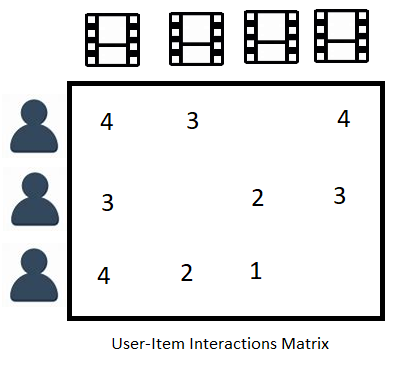

In [ ]:
user_movie_matrix = data.pivot_table(index = 'user_id', columns = ['title'], values = 'rating')
user_movie_matrix.head()

In [ ]:
user_movie_matrix = data.pivot_table(index = 'user_id', columns = ['title'], values = 'rating').fillna(0)
user_movie_matrix.head()

### Building Item-based Collaborative Filtering (Part 1)

▪ Item-based collaborative filtering is the recommendation system to use the similarity between items based on the ratings given by users.

### Identifying Users who Rated a Given Movie

https://practicaldatascience.co.uk/data-science/how-to-create-a-collaborative-filtering-recommender-system

In [ ]:
users_ratings = user_movie_matrix['101 Dalmatians (1996)']
users_ratings.head(10)

In [ ]:
users_ratings = user_movie_matrix['Young Guns (1988)']
users_ratings.head(10)

In [ ]:
users_ratings = user_movie_matrix['Star Wars (1977)']
users_ratings.head(10)

### Finding Correlations between A Selected Movie and All Other Movies

▪ We can find the correlations of all movies against our target movie ('Star Wars (1977)') using the Pandas **corrwith()** function

▪ If the item-based recommender system finds a high correlation, then it assumes similarity between movies.

▪ **corrwith()** computes a pairwise correlation of the the rated movie series (or vector) with all of the other movies and returns the movies which have the most ratings in common. 

▪ The syntax of the corrwith() is: DataFrame.corrwith(other, axis=0, drop=False, method='pearson')

▪ axis refers to the axis to be used, where 0 refers to **column-wise** computation, and 1 refers to **row-wise**. 

https://www.educative.io/answers/what-is-corrwith-function-in-pandas

In [ ]:
similar_movies = user_movie_matrix.corrwith(users_ratings)
similar_movies

In [ ]:
# Create a dataframe with similar movies as the index column and name another column as correlation
similar_movies = pd.DataFrame(similar_movies, columns = ['correlation'])
similar_movies.head(10)

### Recommending The Most Similar Movies

▪ If we sort the movies in descending order of correlation with our target film, we get back a list of the ones which are highly correlated. 

▪ As the correlation will be higher we can use them as our recommendation.

In [ ]:
similar_movies.sort_values(by = 'correlation', ascending = False).head(10)

### Recommending The Most Similar Popular Movies 

▪ Although they are highly correlated, it is unsure whether they are popular movies or not.

▪ Assuming that the more votes a movie has, the more popular it is, therefore, to find out whether they are strong or weak recommendations, the number of ratings have to be taken into consideration

In [ ]:
similar_movies.head(10)

In [ ]:
df_rating = pd.DataFrame(data.groupby('title')['rating'].count())  
df_rating.head(10)

In [ ]:
similar_movies = similar_movies.join(df_rating['rating']).sort_values(by = 'correlation', ascending = False)
similar_movies

### Recommending 20 Most Similar Popular Movies 

In [ ]:
# Similar movies like starwars 
similar_movies_2 = similar_movies[similar_movies['rating'] > 100].sort_values(by = 'correlation', ascending = False)
similar_movies_2.head(20)

### Building User-based Collaborative Filtering (Part 2)

▪ User-based collaborative filtering is a technique used to predict the items that a user might like on the basis of ratings given to that item by the other users who have similar taste with that of the target user. 

In [ ]:
user_movie_matrix = data.pivot_table(index = 'user_id', columns = ['title'], values = 'rating').fillna(0)
user_movie_matrix.head()

In [ ]:
movie_user_matrix = user_movie_matrix.transpose()
movie_user_matrix.head(10)

### Identify Ratings for Movies per User

In [ ]:
# Retrieving column with the label 2 by indexing operator
movie_ratings = movie_user_matrix[2]
movie_ratings.head(10)

In [ ]:
# Retrieving column with the label 7 by indexing operator
movie_ratings = movie_user_matrix[7]
movie_ratings.head(10)

### Finding Correlations between A User and All Other Users

▪ We can find the correlations of all users against our target user ('user_id' = 0) using the Pandas **corrwith()** function. 

▪ This is done by first generating data of the number of movies rated together.

▪ If the user-based recommender system finds a high correlation, then it assumes similarity between users, and recommend movies based on similarity between users.

In [ ]:
# This is to find correlation between users based on the ratings of movies
similar_users = movie_user_matrix.corrwith(movie_ratings)

# Create a dataframe with similar movies as the index column and correlation as another column
similar_users = pd.DataFrame(similar_users, columns = ['correlation'])
similar_users.head(10)

### Recommending Movies Based on The Most Similar User

▪ If we sort the users in descending order of correlation with our target user, we get back a list of the ones which are highly correlated. 

▪ As the correlation will be higher we can use them as our recommendation.

▪ The following code prints one user that is most similar to the selected user.

In [ ]:
most_similar_users = similar_users.sort_values(by = 'correlation', ascending = False).iloc[1:11]
most_similar_users

In [ ]:
# Extract user_id of the most similar users
users = most_similar_users.index.values.tolist()
users[0]

In [ ]:
recommendation = data[data['user_id'] == users[0]]
recommendation

### DataFrame Slicing By Condition

▪ **Condition 1**: the most similar user

▪ **Condition 2**: rating > 0

https://www.codegrepper.com/code-examples/python/how+to+extract+the+data+with+certain+condition+in+pandas

In [ ]:
recommendation = data.loc[(data['user_id'] == users[0]) & (data['rating'] > 0), ['title', 'rating']]
recommendation

In [ ]:
recommendation = data.loc[(data['user_id'] == users[0]) & (data['rating'] > 3), ['title', 'rating']]
recommendation

## Exercise

Perform steps in <b>Section 3</b> to recommend similar movies to the user if he likes 

1) Liar Liar (1997)

2) Return of the Jedi (1983)